In [1]:
import pandas as pd
df = pd.read_csv('PastHires.csv')

In [2]:
df.sample(5)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
11,4,Y,1,BS,N,Y,Y
4,20,N,2,PhD,Y,N,N
7,3,N,1,BS,N,Y,Y
5,0,N,0,PhD,Y,Y,Y
12,0,N,0,PhD,Y,N,Y


In [4]:
df.replace({'Employed?':{'Y':0,'N':1},'Top-tier school':{'Y':0,'N':1},'Interned':{'Y':0,'N':1},'Hired':{'Y':0,'N':1}},inplace=True)

In [5]:
df.sample(5)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
8,15,0,5,BS,1,1,0
9,0,1,0,BS,1,1,1
2,7,1,6,BS,1,1,1
10,1,1,1,PhD,0,1,1
1,0,1,0,BS,0,0,0


In [10]:
# Prevemp = pd.get_dummies(df['Level of Education'])
# df = pd.concat([df,Prevemp],axis=1)
# df.drop(['Level of Education'],inplace=True,axis=1)
df.sample(6)

,Years Experience,Employed?,Previous employers,Top-tier school,Interned,Hired,BS,MS,PhD
8,15,0,5,1,1,0,1,0,0
10,1,1,1,0,1,1,0,0,1
2,7,1,6,1,1,1,1,0,0
12,0,1,0,0,1,0,0,0,1
0,10,0,4,1,1,0,1,0,0
7,3,1,1,1,0,0,1,0,0


In [26]:
X = df[['Years Experience','Employed?','Previous employers','Top-tier school','Interned','BS','MS','PhD']]
Y = df[['Hired']]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=26)

In [28]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
predictions = model.predict(x_test)

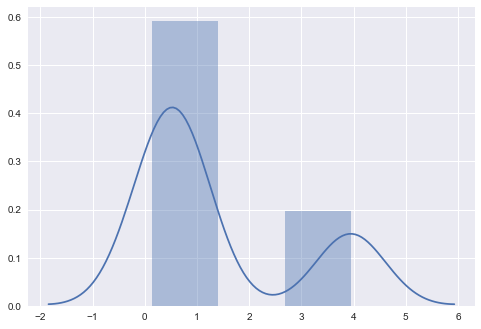

,Years Experience,Employed?,Previous employers,Top-tier school,Interned,BS,MS,PhD
2,7,1,6,1,1,1,0,0
5,0,1,0,0,0,0,0,1
7,3,1,1,1,0,1,0,0
1,0,1,0,0,0,1,0,0
8,15,0,5,1,1,1,0,0


In [32]:
import seaborn as sb
import matplotlib.pyplot as py
sb.distplot(y_test-predictions)
py.show()
X.sample(5)

In [37]:
import numpy as np
myvals = np.array([10,1,3,0,0,0,0,1])
model.predict(myvals)

C:\Users\admin\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[-0.66353383]])